# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

reach pose:  10.001110760032608
reach pose:  10.00444281648306
reach pose:  10.00999534109202


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

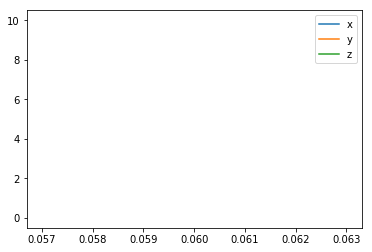

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

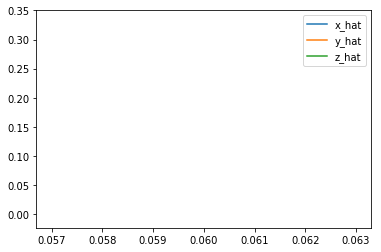

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

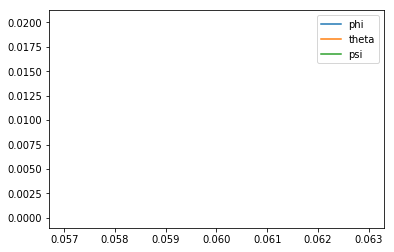

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

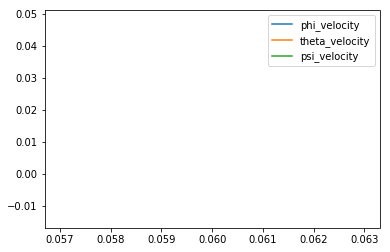

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

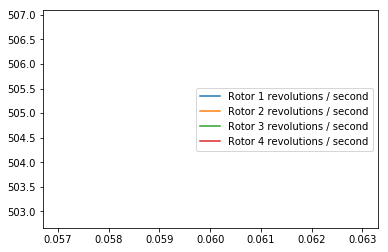

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-9.95536338e-05  7.83693784e-06  1.00099953e+01  1.30994960e-03
  2.02096872e-02  0.00000000e+00]
[-0.0060124   0.0004589   0.33312282]
[-0.01379494  0.04806052  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd

In [10]:

from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   3.829 (best =   3.961), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [43]:
## TODO: Train your agent here.
from agents.agent import DDPG
from task import Task


target_pos = np.array([0., 0., 10.])
init_pos = np.array([0., 0., 5.,0,0,0])
task = Task(runtime=10, init_pose=init_pos, target_pos=target_pos)
agent = DDPG(task) 

In [44]:
num_episodes = 2000

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    c_reward = 0
    #max_force = 0
    while True:
        action = agent.act(state)
        #max_force = max(max_force, action[0])
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        c_reward += reward
        if done:
            if i_episode%5 == 0:
                print("Episode = {:4d}, total reward = {:7.3f}, last reward= {:7.3f}, final pos=( {:7.3f}, {:7.3f}, {:7.3f} )".format(i_episode, c_reward, reward, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2]))  # [debug]
            break

Episode =    5, total reward = -288.945, last reward= -300.000, final pos=(   0.604,  -0.128,   0.487 )
Episode =   10, total reward = -287.170, last reward= -300.000, final pos=(  -0.001,   0.000,   0.755 )
Episode =   15, total reward = -281.684, last reward= -300.000, final pos=(   1.155,   0.109,   0.677 )
Episode =   20, total reward = -294.552, last reward= -300.000, final pos=(  -1.784,   1.420,   0.929 )
Episode =   25, total reward = -285.769, last reward= -300.000, final pos=(   0.114,   1.288,   0.559 )
Episode =   30, total reward = -279.048, last reward= -300.000, final pos=(  -1.252,   1.544,   0.691 )
Episode =   35, total reward = -283.560, last reward= -300.000, final pos=(  -2.947,  -0.386,   0.950 )
Episode =   40, total reward = -291.689, last reward= -300.000, final pos=(   1.290,  -0.433,   0.975 )
Episode =   45, total reward = -286.869, last reward= -300.000, final pos=(   0.311,  -0.347,   0.820 )
Episode =   50, total reward = -285.786, last reward= -300.000, 

reach pose:  10.139041438036545
reach pose:  10.051649848330342
Episode =  315, total reward = -292.393, last reward= -300.000, final pos=(   1.026,  -7.592,   0.531 )
reach pose:  10.067816786516973
Episode =  320, total reward = -294.007, last reward= -300.000, final pos=(  -0.331,   3.845,   0.711 )
reach pose:  10.117705798247854
reach pose:  10.157468922871523
Episode =  325, total reward = 1142.241, last reward= 1000.000, final pos=(   2.090,   8.734,  10.157 )
reach pose:  10.240425071414515
Episode =  330, total reward = -292.324, last reward= -300.000, final pos=(   2.080,  -9.247,   0.562 )
reach pose:  10.01519295894504
Episode =  335, total reward = 1098.388, last reward= 1000.000, final pos=(   3.750, -24.731,  10.015 )
reach pose:  10.054457311848065
reach pose:  10.052183489713451
Episode =  340, total reward = -305.802, last reward= -300.000, final pos=(   2.922, -13.109,   0.668 )
reach pose:  10.193714325524354
Episode =  345, total reward = -290.576, last reward= -30

reach pose:  10.414493534094857
reach pose:  10.409820715450198
reach pose:  10.415916051499787
Episode =  490, total reward = 1080.566, last reward= 1000.000, final pos=(  -0.000,  -0.019,  10.416 )
reach pose:  10.404510827219115
reach pose:  10.408843706083234
reach pose:  10.412808674941404
reach pose:  10.417727348897046
reach pose:  10.413751477470454
Episode =  495, total reward = 1080.515, last reward= 1000.000, final pos=(  -0.000,   0.061,  10.414 )
reach pose:  10.414129360034135
reach pose:  10.41328112575947
reach pose:  10.412415077671707
reach pose:  10.411036534285795
reach pose:  10.41051427491865
Episode =  500, total reward = 1080.506, last reward= 1000.000, final pos=(   0.000,   0.063,  10.411 )
reach pose:  10.414275951695425
reach pose:  10.415477869991522
reach pose:  10.412847084599335
reach pose:  10.408614317722744
reach pose:  10.404958310740913
Episode =  505, total reward = 1080.341, last reward= 1000.000, final pos=(   0.000,   0.231,  10.405 )
reach pose

reach pose:  10.408588204958791
Episode =  645, total reward = 1080.361, last reward= 1000.000, final pos=(  -0.000,   0.255,  10.409 )
reach pose:  10.410168049507629
reach pose:  10.415154052708923
reach pose:  10.414920252468576
reach pose:  10.414508474515
reach pose:  10.414218753104574
Episode =  650, total reward = 1080.559, last reward= 1000.000, final pos=(  -0.000,  -0.019,  10.414 )
reach pose:  10.417364620127163
reach pose:  10.411379691096833
reach pose:  10.411532722276878
reach pose:  10.419061288064041
reach pose:  10.414059417970508
Episode =  655, total reward = 1080.533, last reward= 1000.000, final pos=(  -0.000,  -0.001,  10.414 )
reach pose:  10.409352322365674
reach pose:  10.41236553146858
reach pose:  10.410489155921091
reach pose:  10.412920119122536
reach pose:  10.412038845121776
Episode =  660, total reward = 1080.550, last reward= 1000.000, final pos=(  -0.000,   0.007,  10.412 )
reach pose:  10.409980310733514
reach pose:  10.412350432749118
reach pose: 

reach pose:  10.411576543202626
reach pose:  10.41425687159855
reach pose:  10.406355305231651
reach pose:  10.411903242118546
reach pose:  10.415519096940297
Episode =  805, total reward = 1080.557, last reward= 1000.000, final pos=(   0.000,  -0.033,  10.416 )
reach pose:  10.416745215229806
reach pose:  10.418892670879332
reach pose:  10.41075865686201
reach pose:  10.408533479615201
reach pose:  10.416364250273691
Episode =  810, total reward = 1080.582, last reward= 1000.000, final pos=(  -0.000,  -0.014,  10.416 )
reach pose:  10.41206421286473
reach pose:  10.409085822638692
reach pose:  10.410205553734873
reach pose:  10.411689832158531
reach pose:  10.417462365533956
Episode =  815, total reward = 1080.586, last reward= 1000.000, final pos=(   0.000,  -0.015,  10.417 )
reach pose:  10.414839207184517
reach pose:  10.408346708224691
reach pose:  10.413796455470383
reach pose:  10.409881946225372
reach pose:  10.412778968508265
Episode =  820, total reward = 1080.551, last rewar

reach pose:  10.412815499289318
reach pose:  10.410617308236564
reach pose:  10.410792393814956
Episode =  960, total reward = 1080.527, last reward= 1000.000, final pos=(   0.000,  -0.032,  10.411 )
reach pose:  10.415866763891357
reach pose:  10.416425200782358
reach pose:  10.411943011310804
reach pose:  10.412551929257452
reach pose:  10.412345014937692
Episode =  965, total reward = 1080.553, last reward= 1000.000, final pos=(  -0.000,  -0.013,  10.412 )
reach pose:  10.415275124858564
reach pose:  10.414657091779608
reach pose:  10.411969155173693
reach pose:  10.414909186475576
reach pose:  10.413189047252805
Episode =  970, total reward = 1080.476, last reward= 1000.000, final pos=(  -0.000,   0.094,  10.413 )
reach pose:  10.412156310773048
reach pose:  10.412456218795867
reach pose:  10.41331833531234
reach pose:  10.415179102770482
reach pose:  10.415431708889011
Episode =  975, total reward = 1080.559, last reward= 1000.000, final pos=(  -0.000,   0.057,  10.415 )
reach pos

reach pose:  10.414847340370446
Episode = 1115, total reward = 1080.473, last reward= 1000.000, final pos=(  -0.000,   0.153,  10.415 )
reach pose:  10.411159195632665
reach pose:  10.41305600830122
reach pose:  10.415886912965812
reach pose:  10.400682700275535
reach pose:  10.41812843439637
Episode = 1120, total reward = 1080.549, last reward= 1000.000, final pos=(  -0.000,   0.059,  10.418 )
reach pose:  10.411999903314744
reach pose:  10.41493405018014
reach pose:  10.413983105240005
reach pose:  10.411388443912792
reach pose:  10.411585379660481
Episode = 1125, total reward = 1080.532, last reward= 1000.000, final pos=(  -0.000,  -0.026,  10.412 )
reach pose:  10.41452401395109
reach pose:  10.416213410464069
reach pose:  10.41186249853899
reach pose:  10.41855308718188
reach pose:  10.413782071535415
Episode = 1130, total reward = 1080.558, last reward= 1000.000, final pos=(  -0.000,  -0.013,  10.414 )
reach pose:  10.415662294734119
reach pose:  10.416346224920362
reach pose:  1

reach pose:  10.414701754361849
reach pose:  10.415301176375152
reach pose:  10.41190474766758
reach pose:  10.411313050675863
reach pose:  10.414619382381595
Episode = 1275, total reward = 1080.537, last reward= 1000.000, final pos=(   0.000,   0.040,  10.415 )
reach pose:  10.41487201152455
reach pose:  10.410140003322962
reach pose:  10.415008626495021
reach pose:  10.412217433958073
reach pose:  10.413879598546245
Episode = 1280, total reward = 1080.507, last reward= 1000.000, final pos=(   0.000,   0.067,  10.414 )
reach pose:  10.409769415247283
reach pose:  10.41182166718398
reach pose:  10.408665502878232
reach pose:  10.415166546025036
reach pose:  10.412578888887083
Episode = 1285, total reward = 1080.541, last reward= 1000.000, final pos=(   0.000,   0.006,  10.413 )
reach pose:  10.41488070974913
reach pose:  10.41316176815418
reach pose:  10.416910706019076
reach pose:  10.416019878884635
reach pose:  10.41705278376854
Episode = 1290, total reward = 1080.576, last reward= 

reach pose:  10.416506704512924
reach pose:  10.41582441142409
reach pose:  10.413987767498805
Episode = 1430, total reward = 1080.544, last reward= 1000.000, final pos=(  -0.000,  -0.035,  10.414 )
reach pose:  10.414236330020366
reach pose:  10.409700024678905
reach pose:  10.415500917482845
reach pose:  10.41042956857324
reach pose:  10.410676119670086
Episode = 1435, total reward = 1080.530, last reward= 1000.000, final pos=(   0.000,   0.019,  10.411 )
reach pose:  10.413273626811067
reach pose:  10.414775583498106
reach pose:  10.4153604735777
reach pose:  10.413974794753235
reach pose:  10.405738131410981
Episode = 1440, total reward = 1080.493, last reward= 1000.000, final pos=(   0.000,  -0.046,  10.406 )
reach pose:  10.419778131891434
reach pose:  10.41093196888902
reach pose:  10.408154053409344
reach pose:  10.412333504902522
reach pose:  10.409815992187642
Episode = 1445, total reward = 1080.519, last reward= 1000.000, final pos=(  -0.000,  -0.029,  10.410 )
reach pose:  

reach pose:  10.417598528371514
Episode = 1585, total reward = 1080.586, last reward= 1000.000, final pos=(  -0.000,  -0.006,  10.418 )
reach pose:  10.407697829135497
reach pose:  10.418083540983195
reach pose:  10.41413050294389
reach pose:  10.410963934569386
reach pose:  10.409301337066108
Episode = 1590, total reward = 1080.520, last reward= 1000.000, final pos=(   0.000,  -0.017,  10.409 )
reach pose:  10.41375394787392
reach pose:  10.41475198541358
reach pose:  10.411233931658266
reach pose:  10.411025239531298
reach pose:  10.409900906320768
Episode = 1595, total reward = 1080.528, last reward= 1000.000, final pos=(  -0.000,   0.009,  10.410 )
reach pose:  10.417719289305264
reach pose:  10.410495939352746
reach pose:  10.411906237407955
reach pose:  10.40694668134053
reach pose:  10.408591518656003
Episode = 1600, total reward = 1080.525, last reward= 1000.000, final pos=(  -0.000,   0.008,  10.409 )
reach pose:  10.417690362486535
reach pose:  10.414689284789974
reach pose: 

reach pose:  10.409962339038627
reach pose:  10.419163438108468
reach pose:  10.41022585638555
reach pose:  10.415877445076829
reach pose:  10.408541539742641
Episode = 1745, total reward = 1080.517, last reward= 1000.000, final pos=(  -0.000,  -0.018,  10.409 )
reach pose:  10.411675341622608
reach pose:  10.41161256678121
reach pose:  10.414809658081039
reach pose:  10.415485311125833
reach pose:  10.411263741866671
Episode = 1750, total reward = 1080.448, last reward= 1000.000, final pos=(   0.000,   0.181,  10.411 )
reach pose:  10.410944483294351
reach pose:  10.41142956883262
reach pose:  10.413666287129525
reach pose:  10.415185216508883
reach pose:  10.417137356052098
Episode = 1755, total reward = 1080.483, last reward= 1000.000, final pos=(   0.000,   0.145,  10.417 )
reach pose:  10.410893491033304
reach pose:  10.413759551093774
reach pose:  10.41052664079579
reach pose:  10.414392323523025
reach pose:  10.399183029295521
Episode = 1760, total reward = 1080.269, last reward

reach pose:  10.415032764635525
reach pose:  10.413589887231943
reach pose:  10.407575054987236
Episode = 1900, total reward = 1080.518, last reward= 1000.000, final pos=(  -0.000,   0.004,  10.408 )
reach pose:  10.411810220600557
reach pose:  10.416260919037219
reach pose:  10.408776062373974
reach pose:  10.408357372801401
reach pose:  10.411163433293723
Episode = 1905, total reward = 1080.536, last reward= 1000.000, final pos=(   0.000,  -0.018,  10.411 )
reach pose:  10.417664926584946
reach pose:  10.40825213990501
reach pose:  10.410662596239467
reach pose:  10.409065259316831
reach pose:  10.406109648485938
Episode = 1910, total reward = 1080.502, last reward= 1000.000, final pos=(   0.000,  -0.022,  10.406 )
reach pose:  10.40474243322354
reach pose:  10.415068264275831
reach pose:  10.411708922907575
reach pose:  10.411251433477235
reach pose:  10.411603296506113
Episode = 1915, total reward = 1080.553, last reward= 1000.000, final pos=(   0.000,   0.022,  10.412 )
reach pose

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [45]:
## TODO: Plot the rewards.
#runtime = 5.                                     # time limit of the episode
#init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
#init_velocities = np.array([0., 0., 0.])         # initial velocities
#init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
#task = Task(runtime=runtime, target_pos=target_pos)
#agent = DDPG(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity','rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4', 'Q-value']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    #agent.disableExplore()
    state = agent.reset_episode()
    action_up = np.array([410])
    action_down = np.array([400])
    while True:
        action = agent.act(state)
        #if task.sim.pose[2]>=10:
        #    action = action_down+agent.noise.sample()
        #else:
        #    action = action_up+agent.noise.sample()
        #task.step(action)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        qvalue = agent.critic_target.model.predict_on_batch([np.array([state]),np.array([action])])
        #print(qvalue[0])
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)+list(qvalue[0])
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break
        state = next_state

reach pose:  10.409270980260777


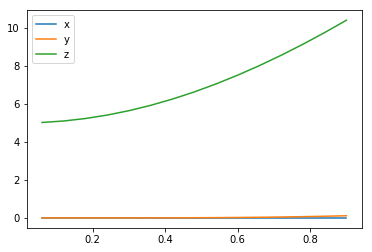

In [46]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

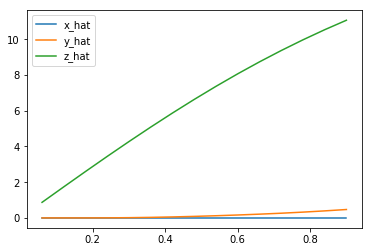

In [47]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

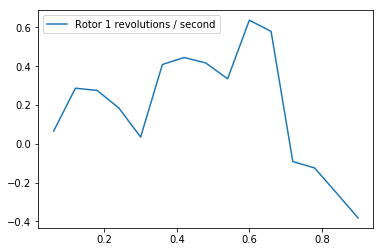

In [53]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.legend()
_ = plt.ylim()



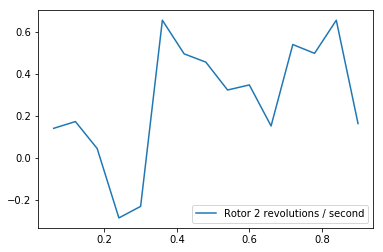

In [50]:
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.legend()
_ = plt.ylim()

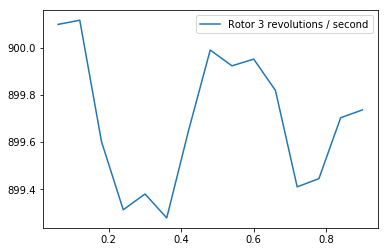

In [51]:
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.legend()
_ = plt.ylim()

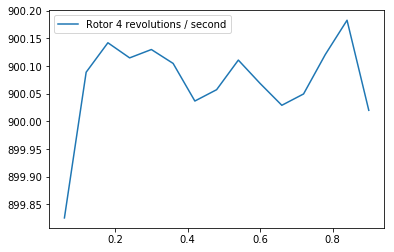

In [52]:
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [ ]:
plt.plot(results['time'], results['action'], label='action')
plt.legend()
_ = plt.ylim()

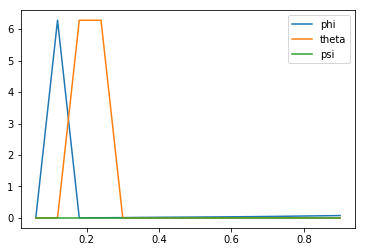

In [54]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

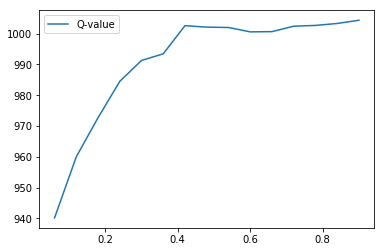

In [55]:
plt.plot(results['time'], results['Q-value'], label='Q-value')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: